In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
data = pd.read_csv("laptop.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.shape

(1303, 13)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
data.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1,inplace = True)

In [7]:
data.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
data.duplicated().sum()

29

In [11]:
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


In [14]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
# data['Inches'] = data ['Inches'].astype('float')

In [16]:

data[data['Inches'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [17]:
value = '?'
(data == value).any()

Company             False
TypeName            False
Inches               True
ScreenResolution    False
Cpu                 False
Ram                 False
Memory               True
Gpu                 False
OpSys               False
Weight               True
Price               False
dtype: bool

In [18]:
data['Inches']=data['Inches'].replace('?',None)

In [19]:
data['Inches']=data['Inches'].astype('float')

In [20]:
data['Inches'] = data['Inches'].fillna(round(data['Inches'].mean(),1))

In [21]:
data['Inches'].isnull().sum()

0

In [22]:
data[data['Memory']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [23]:
data['Memory'] = data['Memory'].replace("?",None)

In [24]:
data['Memory'] = data['Memory'].fillna(data['Memory'].mode()[0])

In [25]:
data[data['Weight']=='?'] 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [26]:
data['Weight'] = data['Weight'].str.replace('kg','')

In [27]:
data['Weight'] = data['Weight'].replace("?",None)

In [28]:
data['Weight'] = data['Weight'].astype('float')

In [29]:
data['Weight'] = data['Weight'].fillna(round(data['Weight'].mean(),1))

In [30]:
value = '?'
(data == value).any()

Company             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price               False
dtype: bool

In [31]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Ram'] = data['Ram'].astype('int')

In [32]:
data.duplicated().sum()

0

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 111.8+ KB


In [34]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<Axes: xlabel='Company'>

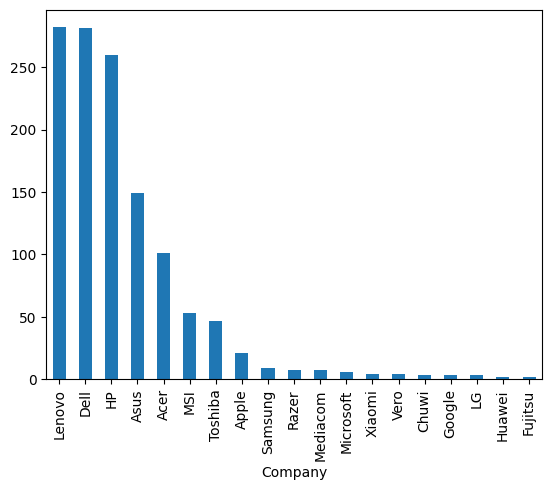

In [35]:
data['Company'].value_counts().plot(kind='bar')

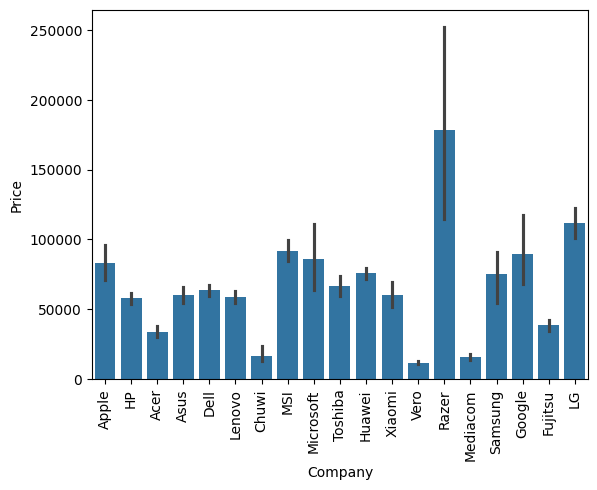

In [36]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [37]:
px.scatter(data,x=data['Inches'],y=data['Price'])

In [38]:
d = data['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])
data['width'] = d.str.split('x').apply(lambda x:x[0])
data['height'] = d.str.split('x').apply(lambda x:x[1])

In [39]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,width,height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080


In [40]:
data['touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [41]:
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

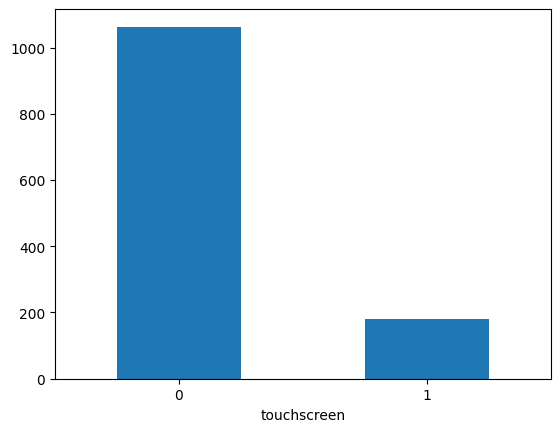

In [42]:
data['touchscreen'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')

<Axes: xlabel='touchscreen', ylabel='Price'>

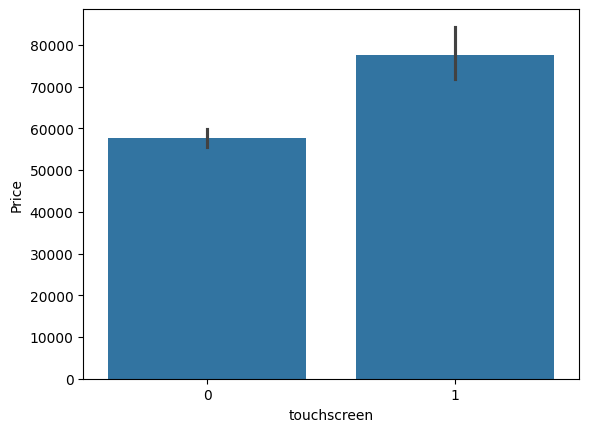

In [43]:
sns.barplot(x=data['touchscreen'],y=data['Price'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

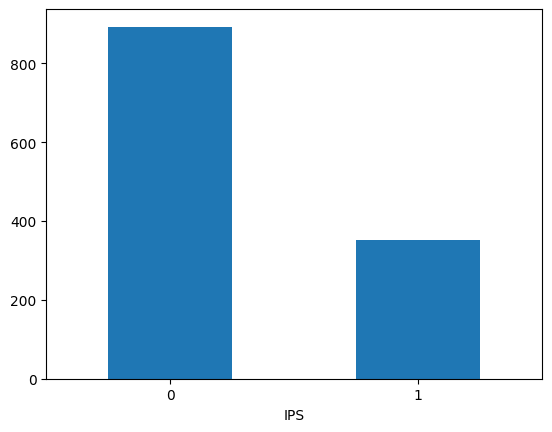

In [44]:
data['IPS'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')

<Axes: xlabel='IPS', ylabel='Price'>

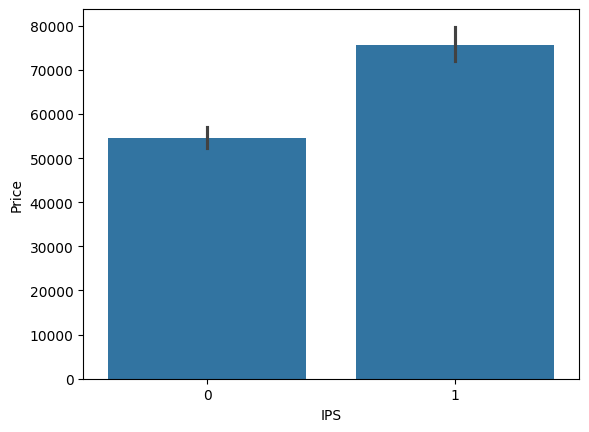

In [45]:
sns.barplot(x=data['IPS'],y=data['Price'])

In [46]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,width,height,touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,1


In [47]:
data['width']=data['width'].astype('int')
data['height']=data['height'].astype('int')

In [48]:
data['Pixel_per_inch'] = ((((data['width']**2) + (data['height']**2))**0.5)/data['Inches']).astype('float')

In [49]:
data.drop(columns=['Inches','ScreenResolution','width','height'],inplace = True)

In [50]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Pixel_per_inch
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [51]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [52]:
a = data['Cpu'].apply(lambda x:' '.join(x.split(' ')[0:3]))

In [53]:
def extraxt_cpu_brand(x):
    if x in ['Intel Core i7','Intel Core i5','Intel Core i3','Intel Celeron Dual','Intel Pentium Quad','Intel Core M']:
        return x 
    elif x.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
cpu_brand = a.apply(lambda x:extraxt_cpu_brand(x))
cpu_brand

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1269         Intel Core i7
1270         Intel Core i7
1271         Intel Core i7
1272    Intel Celeron Dual
1273         Intel Core i7
Name: Cpu, Length: 1244, dtype: object

In [54]:
data['cpu_brand'] = cpu_brand

<Axes: xlabel='cpu_brand'>

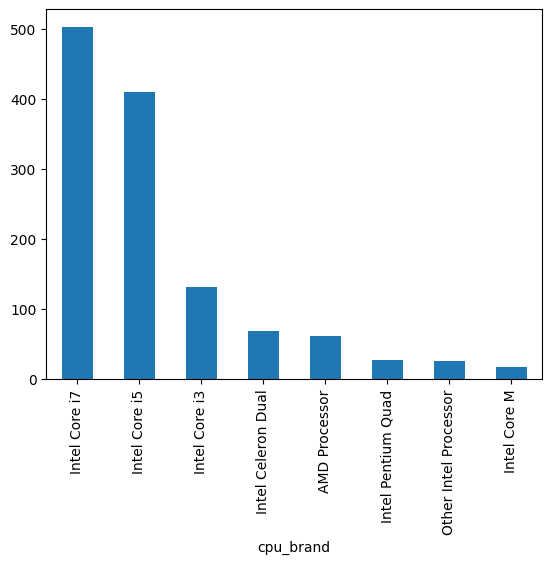

In [55]:
data['cpu_brand'].value_counts().plot(kind='bar')

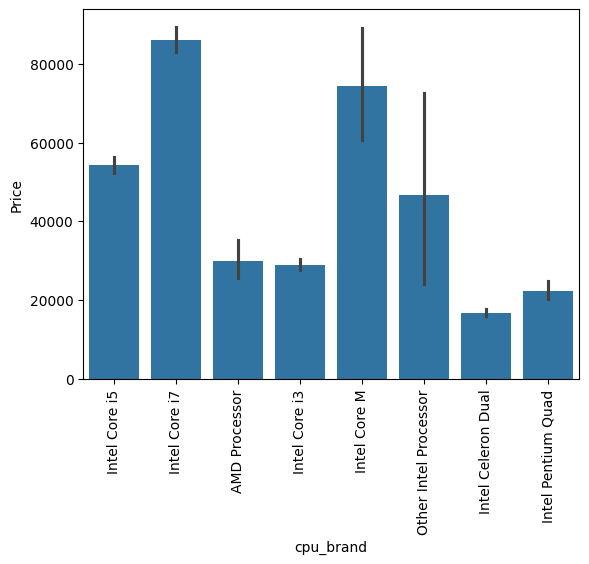

In [56]:
sns.barplot(data,x=data['cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
data.drop('Cpu',axis=1,inplace=True)

In [58]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [59]:
data['gpu_brand'] = data['Gpu'].apply(lambda x:(x.split()[0]))

In [60]:
data = data[data['gpu_brand']!='ARM']

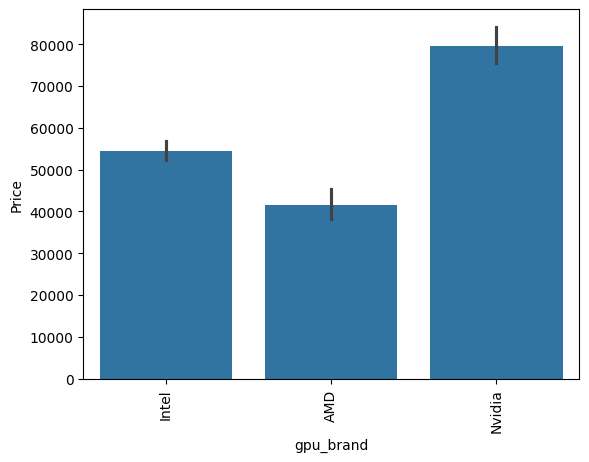

In [61]:
sns.barplot(x=data['gpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
data.drop(columns=['Gpu'],inplace=True)

In [63]:
data['OpSys'].value_counts()

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

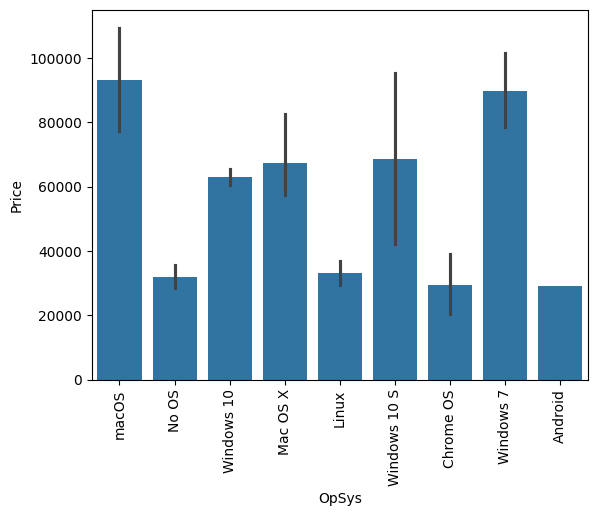

In [64]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
win = ['Windows 7','Windows 10','Windows 10 S']
oth = ['Linux','Chrome OS','Android']
def os(x):
    if x in win:
        return 'Windows'
    elif x == 'macOS':
        return 'macOS'
    elif x == 'Mac OS X':
        return 'Mac OS X'
    elif x in oth:
        return 'Other OS'
    else:
        return 'No OS'
data['Op_sys'] = data['OpSys'].apply(lambda x:os(x))

In [66]:
data.head(3)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,macOS
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,macOS
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,No OS


In [67]:
data['Op_sys'].value_counts()

Op_sys
Windows     1075
Other OS      84
No OS         63
macOS         13
Mac OS X       8
Name: count, dtype: int64

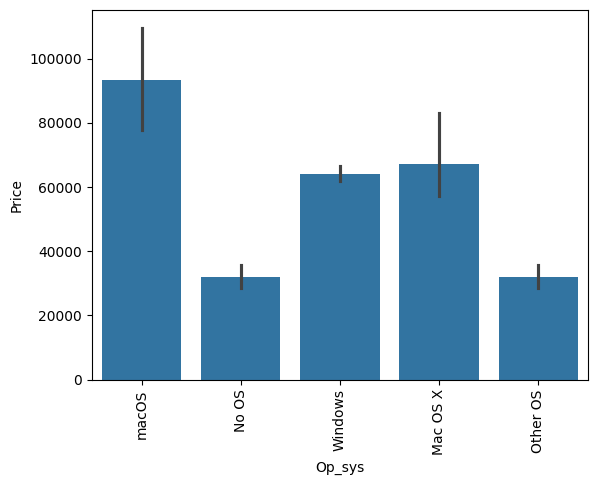

In [68]:
sns.barplot(x=data['Op_sys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
data.drop('OpSys',axis=1,inplace=True)

In [70]:
data = data.reset_index(drop = True)
data

,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,macOS
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,macOS
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,No OS
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,macOS
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,macOS
...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Asus,Notebook,4,500GB HDD,2.20,38378.6496,0,0,100.454670,Intel Core i7,Nvidia,Windows
1239,Lenovo,2 in 1 Convertible,4,128GB SSD,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel,Windows
1240,Lenovo,2 in 1 Convertible,16,512GB SSD,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel,Windows
1241,Lenovo,Notebook,2,64GB Flash Storage,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Intel,Windows


In [71]:
data['Memory'].value_counts()

Memory
256GB SSD                        402
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                34
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [72]:
p,s = set(),set()
for i in data['Memory']:
    parts = i.split("+")
    if len(parts) == 1:
        primary_part = parts[0].split(' ',1)[1].strip()
        p.add(primary_part)
    if len(parts) > 1:
        secondary_part = parts
        s.add(secondary_part[1].strip().split(' ',)[1]) 
diff_storage = p.union(s)
diff_storage

{'Flash Storage', 'HDD', 'Hybrid', 'SSD'}

In [73]:
d = {'HDD':[],'SSD':[],'Flash Storage':[],'Hybrid':[]}

In [74]:
def slot(x):
        s_cap1 = x[0].strip()
        s_type1 = x[1].strip()
        s_cap2 = x[2].strip()
        s_type2 = x[3].strip()
        for i in d.keys():
            if s_type1 == i :
                d[i].append(s_cap1)
            elif s_type2 == i:
                 d[i].append(s_cap2)
            else:
                d[i].append('0')


def mer(p1,p2):
    p1.extend(p2)
    slot(p1)

for i in data['Memory']:
    st = i.split('+')
    if len(st) == 1:
        r = st
        r.append('0 0')
    port_1 = st[0]
    port_1 = port_1.split(' ',1)
    port_2 = st[1].strip()
    port_2 = port_2.split(' ',1)
    mer(port_1,port_2)
    

In [75]:
s = pd.DataFrame(d)

In [76]:
s

,HDD,SSD,Flash Storage,Hybrid
0,0,128GB,0,0
1,0,0,128GB,0
2,0,256GB,0,0
3,0,512GB,0,0
4,0,256GB,0,0
...,...,...,...,...
1238,500GB,0,0,0
1239,0,128GB,0,0
1240,0,512GB,0,0
1241,0,0,64GB,0


In [77]:
for  i in s.columns:
    data[i] = s[i]

In [78]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,macOS,0,128GB,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,macOS,0,0,128GB,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,No OS,0,256GB,0,0
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,macOS,0,512GB,0,0
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,macOS,0,256GB,0,0


In [79]:
def mem_con(x):
    x = str(x)
    if 'TB' in x:
        if x[:-2] in ['1','1.0']:
            r = str(int(float(x[:-2]))*1024)+'GB'
            x = x.replace(x,r)
            return x 
        else:
            r = str(int(float(x[:-2]))*1024)+'GB'
            x = x.replace(x,r)
            return x 
    else:
        return x    

In [80]:
for i in d.keys():
    data[i] = data[i].apply(lambda x:mem_con(x))

In [81]:
print(data['HDD'].value_counts())
print('-----------------------------------------------------------')
print(data['SSD'].value_counts())
print('-----------------------------------------------------------')
print(data['Hybrid'].value_counts())
print('-----------------------------------------------------------')
data['Flash Storage'].value_counts()

HDD
0         696
1024GB    391
500GB     123
2048GB     31
32GB        1
128GB       1
Name: count, dtype: int64
-----------------------------------------------------------
SSD
256GB     488
0         426
128GB     166
512GB     132
1024GB     15
32GB        6
180GB       4
16GB        3
64GB        1
240GB       1
8GB         1
Name: count, dtype: int64
-----------------------------------------------------------
Hybrid
0         1233
1024GB       9
508GB        1
Name: count, dtype: int64
-----------------------------------------------------------


Flash Storage
0        1175
32GB       34
64GB       13
256GB       8
16GB        7
128GB       4
512GB       2
Name: count, dtype: int64

In [82]:
data.head()

,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,macOS,0,128GB,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,macOS,0,0,128GB,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,No OS,0,256GB,0,0
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,macOS,0,512GB,0,0
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,macOS,0,256GB,0,0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1243 non-null   object 
 1   TypeName        1243 non-null   object 
 2   Ram             1243 non-null   int32  
 3   Memory          1243 non-null   object 
 4   Weight          1243 non-null   float64
 5   Price           1243 non-null   float64
 6   touchscreen     1243 non-null   int64  
 7   IPS             1243 non-null   int64  
 8   Pixel_per_inch  1243 non-null   float64
 9   cpu_brand       1243 non-null   object 
 10  gpu_brand       1243 non-null   object 
 11  Op_sys          1243 non-null   object 
 12  HDD             1243 non-null   object 
 13  SSD             1243 non-null   object 
 14  Flash Storage   1243 non-null   object 
 15  Hybrid          1243 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(10)
memory usage: 150.6+ KB


In [84]:
for i in d.keys():
    data[i] = data[i].str.replace('GB','')
    data[i] = data[i].astype('int')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1243 non-null   object 
 1   TypeName        1243 non-null   object 
 2   Ram             1243 non-null   int32  
 3   Memory          1243 non-null   object 
 4   Weight          1243 non-null   float64
 5   Price           1243 non-null   float64
 6   touchscreen     1243 non-null   int64  
 7   IPS             1243 non-null   int64  
 8   Pixel_per_inch  1243 non-null   float64
 9   cpu_brand       1243 non-null   object 
 10  gpu_brand       1243 non-null   object 
 11  Op_sys          1243 non-null   object 
 12  HDD             1243 non-null   int32  
 13  SSD             1243 non-null   int32  
 14  Flash Storage   1243 non-null   int32  
 15  Hybrid          1243 non-null   int32  
dtypes: float64(3), int32(5), int64(2), object(6)
memory usage: 131.2+ KB


In [86]:
data.drop('Memory',axis=1,inplace = True)

In [87]:
num = data.drop(columns = ['Company','TypeName','cpu_brand','gpu_brand','Op_sys'])

In [88]:
num.corr()['Price']

Ram               0.681786
Weight            0.175855
Price             1.000000
touchscreen       0.188202
IPS               0.254138
Pixel_per_inch    0.466836
HDD              -0.095172
SSD               0.673240
Flash Storage    -0.034476
Hybrid            0.022496
Name: Price, dtype: float64

In [89]:
data.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [90]:
data.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,macOS,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,macOS,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,No OS,0,256
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,macOS,0,512
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,macOS,0,256


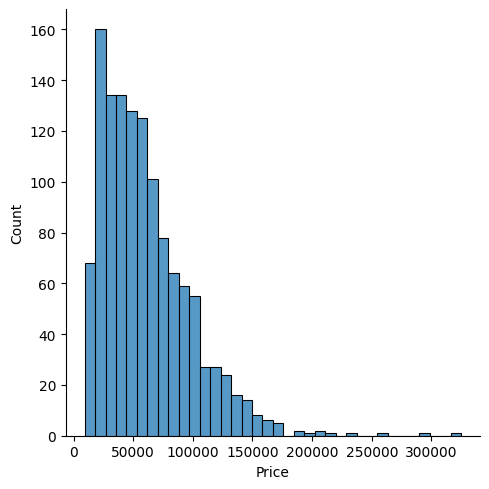

In [91]:
sns.displot(data['Price'])

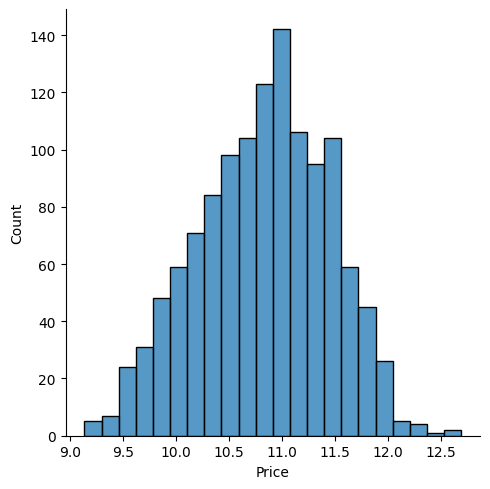

In [92]:
sns.displot(np.log(data['Price']))

In [93]:
x = data.drop(columns = ['Price'])
y = np.log(data['Price'])

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
x_train

,Company,TypeName,Ram,Weight,touchscreen,IPS,Pixel_per_inch,cpu_brand,gpu_brand,Op_sys,HDD,SSD
1072,Dell,Ultrabook,4,1.500,0,0,125.367428,Intel Core i3,Intel,Windows,500,0
96,HP,Gaming,12,2.620,0,1,141.211998,Intel Core i7,Nvidia,Windows,1024,128
1183,Dell,2 in 1 Convertible,8,2.191,1,1,141.211998,Intel Core i5,Intel,Windows,0,256
881,Lenovo,Ultrabook,8,1.130,0,1,157.350512,Intel Core i7,Intel,Windows,0,0
178,Xiaomi,Notebook,8,1.950,0,1,141.211998,Intel Core i5,Nvidia,No OS,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,HP,Ultrabook,8,1.260,0,0,176.232574,Intel Core i5,Intel,Windows,0,256
1095,Dell,Notebook,4,2.090,0,0,100.454670,Intel Core i5,Intel,Other OS,500,0
1130,Lenovo,Notebook,8,2.500,0,0,141.211998,Intel Core i5,AMD,Windows,0,0
860,Asus,Notebook,4,1.650,0,0,111.141337,Intel Celeron Dual,Intel,Windows,0,0


In [96]:
encode = OneHotEncoder(sparse_output = False,drop = 'first')
scaler = StandardScaler()

In [97]:
cat_feat = [0,1,7,8,9]
num_feat = [2,3,4,5,6,10,11]

In [98]:
x_train_encode = encode.fit_transform(x_train.iloc[:,cat_feat])
x_test_encode = encode.transform(x_test.iloc[:,cat_feat])

In [99]:
x_train_scaled = scaler.fit_transform(x_train.iloc[:,num_feat])
x_test_scaled = scaler.transform(x_test.iloc[:,num_feat])

In [100]:
x_train_tran = np.hstack((x_train_encode,x_train_scaled))
x_test_tran = np.hstack((x_test_encode,x_test_scaled))

In [101]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error

In [102]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=8)
rf = RandomForestRegressor()
spvm = SVR()

In [103]:
models = [lr,dt,rf,spvm]
dict = {lr:'LogisticRegression',dt:'DecisionTreeRegressor',rf:'RandomForestRegressor',spvm:'SupportVectorRegression'}

In [104]:
for i in models:
    i.fit(x_train_tran,y_train)
    y_pred = i.predict(x_test_tran)
    print(dict[i]+' :')
    print('R2 score:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print()
    print()


LogisticRegression :
R2 score: 0.7760414646144518
MAE: 0.20349340539304878


DecisionTreeRegressor :
R2 score: 0.7784048553608203
MAE: 0.20271327216788493


RandomForestRegressor :
R2 score: 0.8244881569426952
MAE: 0.17464399922108245


SupportVectorRegression :
R2 score: 0.829273580797295
MAE: 0.17407317369807743




In [105]:
n_rf = RandomForestRegressor(n_estimators=50,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=20)
n_rf.fit(x_train_tran,y_train)
y_pred_rf = n_rf.predict(x_test_tran)
print(r2_score(y_test,y_pred_rf))
mean_absolute_error(y_test,y_pred_rf)

0.8351925256303276


0.16870296580568536

In [106]:
import gradio as gr

c:\Users\U.UV SAI KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [107]:
def prediction(company,typename,ram,weight,touchscreen,ips,ppi,cpu_brand,gpu_brand,op_sys,hdd,ssd):
        if not company:
            return gr.Info("Error: Please select a Company.")
        if not typename:
            return gr.Info("Error: Please provide a TypeName.")
        if ppi is None:
            return gr.Info("Error: Please provide the Pixel per inch (PPI).")
        if not cpu_brand:
            return gr.Info("Error: Please provide the CPU Brand.")
        if not gpu_brand:
            return gr.Info("Error: Please provide the GPU Brand.")


        n_data = {'Company': [company],'TypeName':[typename],
            'Ram':[ram],'Weight':[weight],
            'touchscreen':[touchscreen],'IPS':[ips],
            'Pixel_per_inch':[ppi],
            'cpu_brand':[cpu_brand],
            'gpu_brand':[gpu_brand],'Op_sys':[op_sys],
            'HDD':[hdd],'SSD':[ssd]}
   

        new_data = pd.DataFrame(n_data)
        new_data_encoded = encode.transform(new_data.iloc[:,cat_feat])
        new_data_scaled = scaler.transform(new_data.iloc[:,num_feat])
        new_data_tran = np.hstack((new_data_encoded, new_data_scaled))
        new_prediction = np.exp(rf.predict(new_data_tran))
        actual_price = np.exp(y_test.iloc[0])
        final = new_prediction[0]
        return final


inputs = [gr.Dropdown(label = 'Company',choices =['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']),
          gr.Dropdown(label = 'TypeName',choices =['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible', 'Workstation', 'Netbook']),
          gr.Radio([2, 4, 6, 8, 12, 16, 24, 32, 64],label="RAM (GB)",value = 2),
          gr.Number(label="Weight (kg)",value = 1),
          gr.Checkbox(label="Touchscreen"),
          gr.Checkbox(label="IPS"),
          gr.Slider(44, 352.46, label="Pixel per inch", info="Choose between 44 and 352.46"),
          gr.Dropdown(label = 'cpu_brand',choices =['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3', 'Intel Core M', 'Other Intel Processor', 'Intel Celeron Dual', 'Intel Pentium Quad']),
          gr.Dropdown(label = 'gpu_brand',choices =['Intel', 'AMD', 'Nvidia']),
          gr.Dropdown(label = 'Op_sys',choices =['macOS', 'No OS', 'Windows', 'Mac OS X', 'Other OS'],value="No OS"),
          gr.Radio([0,32,128,500, 1024, 2048],label="HDD (GB)",value=0),
          gr.Radio([0,8,16,32,64,128,180,240,256,512,1024],label="SSD (GB)",value=0)]
pro = gr.Interface(fn=prediction, inputs=inputs, outputs=['number'], title="Laptop Price Predictor")
pro.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
